In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
#import hawaii measurements.csv
hi_measurements = "Resources/hawaii_measurements.csv"
hi_m_df = pd.read_csv(hi_measurements)
hi_m_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [12]:
#convert date string to datetime
hi_m_df["date"] = pd.to_datetime(hi_m_df["date"])
hi_m_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [13]:
hi_m_df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [14]:
#reduce data to the last year available
last_12_df = hi_m_df.loc[hi_m_df["date"] >= "2016-08-23"]
last_12_df.head()

,station,date,prcp,tobs
2363,USC00519397,2016-08-23,0.00,81
2364,USC00519397,2016-08-24,0.08,79
2365,USC00519397,2016-08-25,0.08,80
2366,USC00519397,2016-08-26,0.00,79
2367,USC00519397,2016-08-27,0.00,77


In [15]:
#set date as index
last_12_df.set_index("date", inplace = True)
last_12_df.head()

,station,prcp,tobs
date,,,
2016-08-23,USC00519397,0.00,81
2016-08-24,USC00519397,0.08,79
2016-08-25,USC00519397,0.08,80
2016-08-26,USC00519397,0.00,79
2016-08-27,USC00519397,0.00,77


In [16]:
#drop unnecessary columns for plotting
prcp_df = last_12_df.drop(columns=["station","tobs"])
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


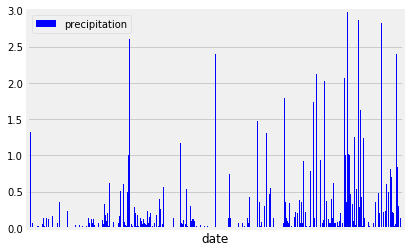

In [17]:
#plot precipitation for the last year
ax = prcp_df.plot(kind="bar", y="prcp",color="blue",label ="precipitation",width=1)
plt.ylim(0,3)
plt.xticks([], [])
plt.show()

In [18]:
# summarize statitistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [19]:
# Design a query to show how many stations are available in this dataset?
stations = hi_m_df['station'].unique()
len(stations)

9

In [20]:
conn = engine.connect()

In [21]:
stations = pd.read_sql("SELECT * FROM Station", conn)
stations.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [22]:
# Find the most active stations 
measurement = pd.read_sql("SELECT station, COUNT(station) AS activity FROM Measurement GROUP BY station ORDER BY activity DESC", conn)
measurement.head(10)

,station,activity
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = pd.read_sql("SELECT station, MAX(tobs) AS max_temp, MIN(tobs) AS min_temp, AVG(tobs) AS avg_temp FROM Measurement WHERE station LIKE '%00519281%'", conn)
temp.head(10)



,station,max_temp,min_temp,avg_temp
0,USC00519281,85.0,54.0,71.663781


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = pd.read_sql("SELECT *FROM Measurement WHERE station LIKE '%00519281%'", conn)
temp.head(10)
temp_df =pd.DataFrame(temp)
temp_df.head()

,id,station,date,prcp,tobs
0,12188,USC00519281,2010-01-01,0.15,70.0
1,12189,USC00519281,2010-01-02,0.00,62.0
2,12190,USC00519281,2010-01-03,0.00,74.0
3,12191,USC00519281,2010-01-04,0.00,75.0
4,12192,USC00519281,2010-01-05,0.00,74.0


In [25]:
#convert date string to datetime
temp_df["date"] = pd.to_datetime(temp_df["date"])


In [26]:
#reduce data to the last 12 months available, each station does not have the same time span of records, 
#so the date has been addressed accordingly
temp_12_df = temp_df.loc[temp_df["date"] >= "2016-08-23"]
temp_12_df.head()

,id,station,date,prcp,tobs
2420,14608,USC00519281,2016-08-23,1.79,77.0
2421,14609,USC00519281,2016-08-24,2.15,77.0
2422,14610,USC00519281,2016-08-25,0.06,80.0
2423,14611,USC00519281,2016-08-26,0.01,80.0
2424,14612,USC00519281,2016-08-27,0.12,75.0


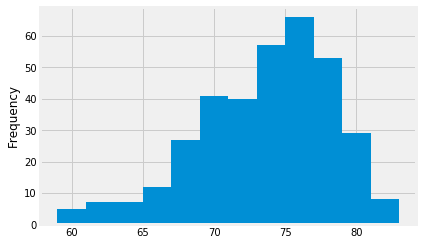

In [27]:
#plot the last 12 months of temperature data as a histogram
plt.hist(x=temp_12_df["tobs"],bins = 12)
plt.ylabel('Frequency');


In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


Text(0.5, 1.0, 'Trip Avg Temp')

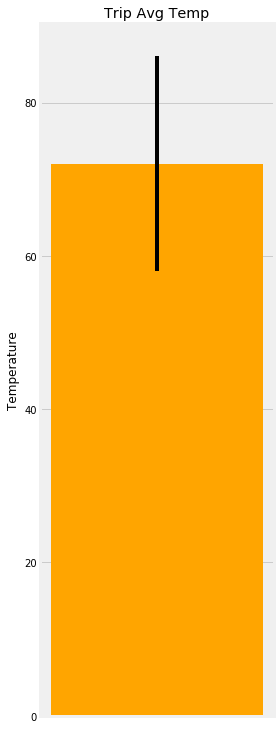

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(4,10))
plt.bar(x=1,height=72.03,yerr=14,color='orange')
plt.ylabel('Temperature')
plt.xticks([], [])
plt.tight_layout()
plt.title("Trip Avg Temp")

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [32]:
#find total precipitation per station from 2017-02-28 to 2017-03-05
rainfall3 = pd.read_sql("SELECT Station.station, Station.name, Station.latitude, Station.longitude, \
                                Station.elevation, SUM(Measurement.prcp) AS Total_Prcp\
                                FROM Station \
                                JOIN Measurement \
                                ON Station.station = Measurement.station \
                                WHERE Measurement.date >= '2017-02-28' AND Measurement.date <= '2017-03-05' \
                                GROUP BY Station.station \
                                ORDER BY SUM(Measurement.prcp) DESC",conn)
rainfall3.head(500)

,station,name,latitude,longitude,elevation,Total_Prcp
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,4.72
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,4.45
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.07
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,2.98
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2.74
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.32
6,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.16


In [33]:
# using pandas to manually verify data in the above block.. the next few blocks of code are just a double check
rainfall = pd.read_sql("SELECT Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp, Measurement.date \
                                FROM Station \
                                JOIN Measurement \
                                ON Station.station = Measurement.station",conn)


rainfall_df = pd.DataFrame(rainfall)
rainfall_df.head()


,station,name,latitude,longitude,elevation,prcp,date
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.08,2010-01-01
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,2010-01-02
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,2010-01-03
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,2010-01-04
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,NaN,2010-01-06


In [34]:

rainfall_df["date"] = pd.to_datetime(rainfall_df["date"])

In [35]:
# manually sum prcp values per station to verify the above SQL query
rainfall_dates_df = rainfall_df.loc[(rainfall_df["date"] >= "2017-02-28")]
rainfall_dates2_df = rainfall_dates_df.loc[(rainfall_dates_df["date"] <= "2017-03-05")]
rainfall_dates2_df.head(15)

,station,name,latitude,longitude,elevation,prcp,date
2552,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,2017-02-28
2553,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1.19,2017-03-01
2554,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.73,2017-03-02
2555,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.47,2017-03-03
2556,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00,2017-03-04
2557,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.35,2017-03-05
5279,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,0.16,2017-02-28
5280,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,2.20,2017-03-01
5281,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,1.45,2017-03-02
5282,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,0.54,2017-03-03


## Optional Challenge Assignment

In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [129]:
# date1 = '05-01'
# date2 = '05-10'
# date_list =[]
# start = dt.datetime.strptime(date1, '%m-%d')
# end = dt.datetime.strptime(date2, '%m-%d')
# step = dt.timedelta(days=1)
# while start <= end:
#     date_list.append(start.date().strftime('%m-%d'))
#     start += step

# print(date_list)

['05-01', '05-02', '05-03', '05-04', '05-05', '05-06', '05-07', '05-08', '05-09', '05-10']


In [126]:

def daily_normals_trip(date1,date2):
    
    date_list =[]
    start = dt.datetime.strptime(date1, '%m-%d')
    end = dt.datetime.strptime(date2, '%m-%d')
    step = dt.timedelta(days=1)
    while start <= end:
        date_list.append(start.date().strftime('%m-%d'))
        start += step
    

    for d in date_list:
        sel = (func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
        print({d:session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == d).all()})
       
daily_normals_trip("05-01","05-10")


{'05-01': [(65.0, 72.75925925925925, 79.0)]}
{'05-02': [(65.0, 73.05084745762711, 79.0)]}
{'05-03': [(67.0, 73.41071428571429, 84.0)]}
{'05-04': [(65.0, 73.59649122807018, 78.0)]}
{'05-05': [(67.0, 73.39655172413794, 79.0)]}
{'05-06': [(66.0, 73.14035087719299, 80.0)]}
{'05-07': [(64.0, 71.78846153846153, 79.0)]}
{'05-08': [(65.0, 72.18867924528301, 80.0)]}
{'05-09': [(67.0, 72.9322033898305, 79.0)]}
{'05-10': [(64.0, 73.3157894736842, 78.0)]}


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
